In [1]:
from expl_bind_beaker_vertex_calc import *
unbound_bound_combined = True
import matplotlib.pyplot as plt
import seaborn as sns

# define system

In [93]:
n_bind = 2 #types of proteins/marks

e_m = np.array([3.5, 3.5]) # binding affininty for type A, B

v_int =  np.nan # not used- mean field binding
M = 50#00 # number ov averaged monomers in backbone polymer
bs_per_M = 100# binding sites per averarged monomer M. bs_per_M = 1 -> no effect on binding behavior
nm = M 

# print("linear binding profile")
# pa_vec = np.arange(0, nm, 1) / (nm-1)
# pb_vec = 1-pa_vec
# poly_marks = [pa_vec, pb_vec]

print("cyl binding profile")
Atype = int(0.9*M)
Btype = M - Atype

pa_vec = np.array(Atype*[0]+Btype*[1])
pb_vec = 1-pa_vec
poly_marks = [pa_vec, pb_vec]


v_s = 1 # solvent volume
v_p = 1 # backbone-polymer monomer volume
v_A = v_p # A binder monomer volume
v_B = v_p # B binder monomer volume
N_P = 5000 #backbone-polymer length (in kuhn lengths)
N_A = 1 # A binder length- point particle limit
# N_A = 50 # A binder length- macromolecule
N_B = N_A # B binder length
b_P = 1 #backbone-polymer kuhn length
b_A = b_P # A binder kuhn length
b_B = b_P # B binder kuhn length

V = 1 
V_p = 3*V
# V_p = 7*V # backbone-polymer solution volume
V_A = V # A binder solution volume
V_B = V*2 # B binder solution volume

# phi_p_i = 1 # unstable!!
phi_p_i = 0.9# initial volume fraction of backbone-polymer solution
# phi_p_i = 0.7
# phi_p_i = 0.5


# del_phi_a_i = 0.01
del_phi_a_i = 0.1 # resolution

# phi_a_i = np.arange(0,1 + del_phi_a_i,del_phi_a_i) # array of iniial volume fractions for A binder solution
# phi_b_i = np.arange(0,1 + del_phi_a_i,del_phi_a_i) # array of iniial volume fractions for B binder solution

print("phi_a_i for cylindrical profile")
phi_a_i = np.array([1])
phi_b_i = np.array([1])

#widened k range, reasonable chis!!
chi_AB = 3000/(0.7*N_P)# at wider k range, have 
# chi_AB = 0/(0.7*N_P)# at wider k range, have 

psol = Polymer_soln(n_bind, v_int, e_m, phi_p_i, phi_a_i, phi_b_i, V_p, V_A, V_B, poly_marks,\
                  v_s, v_p, v_A, v_B, N_P, N_A, N_B, b_P, b_A, b_B, chi_AB, bs_per_M)

cyl binding profile
phi_a_i for cylindrical profile


# mean field binding

## calculation

In [98]:
phi_p_f, phi_a_f, phi_b_f, phi_s, phi_Au_mat, phi_Ab_mat, \
phi_Bu_mat, phi_Bb_mat, mu_A_mat, mu_B_mat, fA_mat, fB_mat, f0_mat, sA_mat, sB_mat = calc_mu_phi_bind(psol,)

In [100]:
chi_AB*N_P*phi_p_f

1928.5714285714284

In [102]:
print("phi_Au_mat: ", phi_Au_mat)
print("phi_Ab_mat: ", phi_Ab_mat)
print("phi_Bu_mat: ", phi_Bu_mat)
print("phi_Bb_mat: ", phi_Bb_mat)
print("sA_mat: ", sA_mat)
print("sB_mat: ", sB_mat)

phi_Au_mat:  [[0.01062813]]
phi_Ab_mat:  [[0.15603854]]
phi_Bu_mat:  [[0.00270486]]
phi_Bb_mat:  [[0.33062847]]
sA_mat:  [[[0.00966017 0.00966017 0.00966017 0.00966017 0.00966017 0.00966017
   0.00966017 0.00966017 0.00966017 0.00966017 0.00966017 0.00966017
   0.00966017 0.00966017 0.00966017 0.00966017 0.00966017 0.00966017
   0.00966017 0.00966017 0.00966017 0.00966017 0.00966017 0.00966017
   0.00966017 0.00966017 0.00966017 0.00966017 0.00966017 0.00966017
   0.00966017 0.00966017 0.00966017 0.00966017 0.00966017 0.00966017
   0.00966017 0.00966017 0.00966017 0.00966017 0.00966017 0.00966017
   0.00966017 0.00966017 0.00966017 0.25981076 0.25981076 0.25981076
   0.25981076 0.25981076]]]
sB_mat:  [[[0.0814148  0.0814148  0.0814148  0.0814148  0.0814148  0.0814148
   0.0814148  0.0814148  0.0814148  0.0814148  0.0814148  0.0814148
   0.0814148  0.0814148  0.0814148  0.0814148  0.0814148  0.0814148
   0.0814148  0.0814148  0.0814148  0.0814148  0.0814148  0.0814148
   0.0814148  0.08

## plotting

### $\phi$

Text(0.5, 49.7222222222222, '$\\phi_B^{(i)}$')

<Figure size 640x480 with 0 Axes>

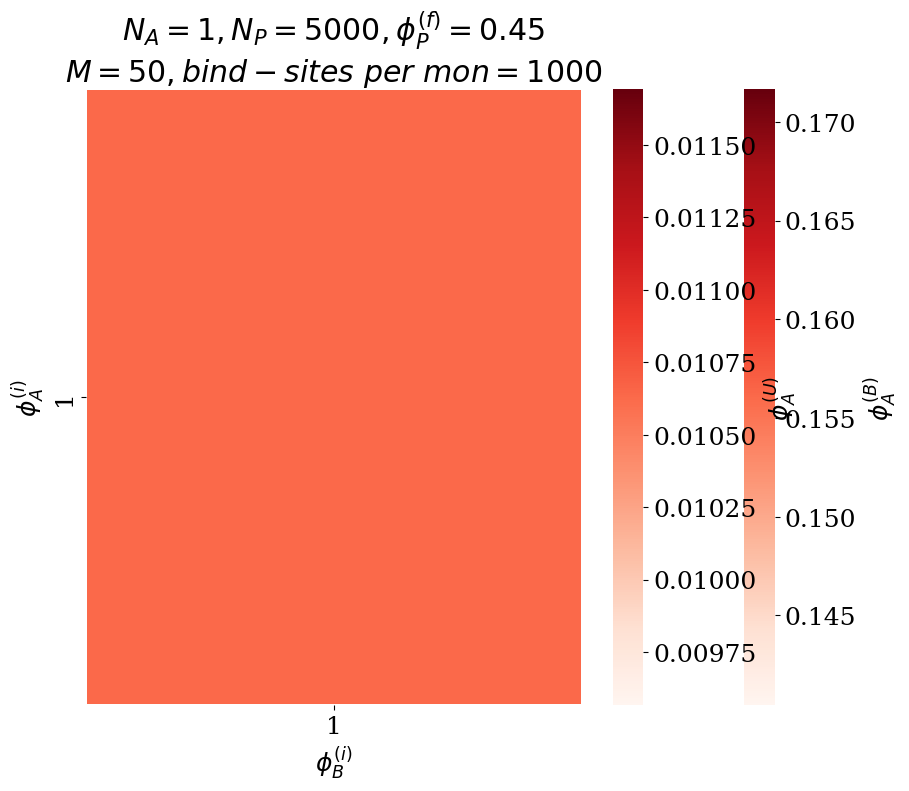

In [106]:
# err = np.sum(phases < 0)
# if err > 0 :
#     raise Exception("IVALID!!")
    
fig = plt.figure()
plt.figure(figsize=(10,8))

font = {'family' : 'serif',
        'weight':'normal',
        'size': 18}
plt.rc('font', **font)

ax = sns.heatmap(phi_Ab_mat, linewidth=0.25, cmap = "Reds", xticklabels=np.round(phi_b_i, 2), yticklabels=np.round(phi_a_i, 2),\
                 cbar_kws={'label':  r"$\phi_A^{(B)}$"})
ax = sns.heatmap(phi_Au_mat, linewidth=0.25, cmap = "Reds", xticklabels=np.round(phi_b_i, 2), yticklabels=np.round(phi_a_i, 2),\
                 cbar_kws={'label':  r"$\phi_A^{(U)}$"})
# ax = sns.heatmap(phi_Bb_mat, linewidth=0.25, cmap = "Blues", xticklabels=np.round(phi_b_i, 2), yticklabels=np.round(phi_a_i, 2),\
#                  cbar_kws={'label':  r"$\phi_B^{(B)}$"})
# ax = sns.heatmap(phi_Bb_mat, linewidth=0.25, cmap = "Blues", xticklabels=np.round(phi_b_i, 2), yticklabels=np.round(phi_a_i, 2),\
#                  cbar_kws={'label':  r"$\phi_B^{(U)}$"})

ax.invert_yaxis()
# plt.title("$\phi_P^{(f)} = %s$" % phi_p_f)
plt.title(r"$ N_A = %s, N_P = %s, \phi_P^{(f)} = %s $" % (N_A, N_P, phi_p_f)  + "\n" + r"$ M = %s, bind-sites \ per \ mon = %s $" % ( M, bs_per_M))

plt.ylabel("$\phi_A^{(i)}$")
plt.xlabel("$\phi_B^{(i)}$")


Text(0.5, 49.7222222222222, '$\\phi_B^{(i)}$')

<Figure size 640x480 with 0 Axes>

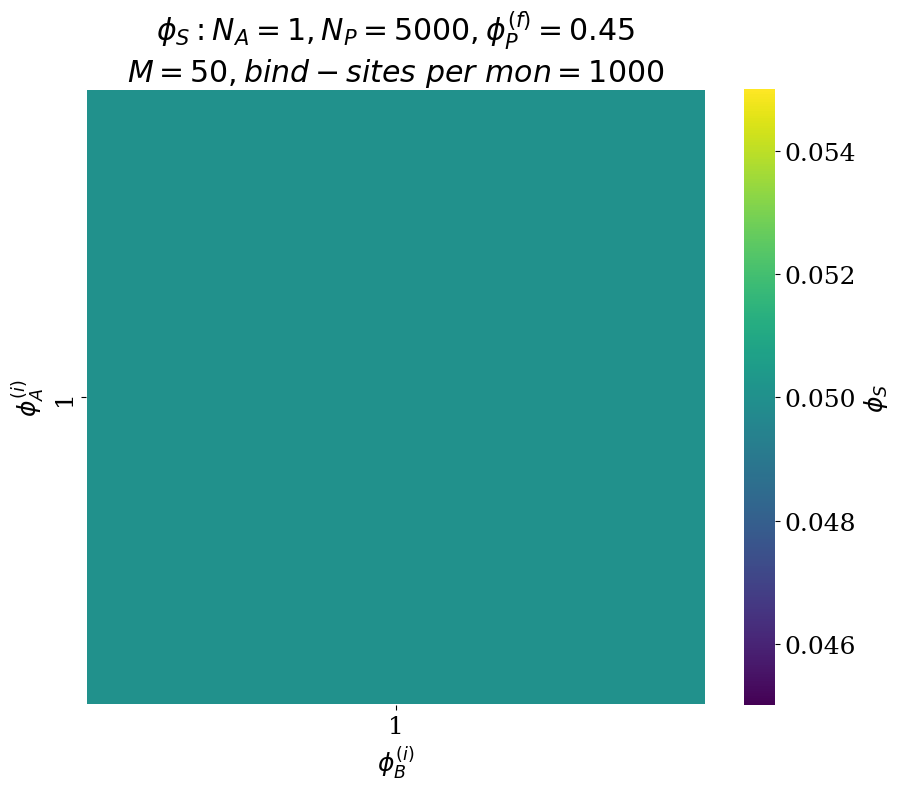

In [107]:
# err = np.sum(phases < 0)
# if err > 0 :
#     raise Exception("IVALID!!")
    
fig = plt.figure()
plt.figure(figsize=(10,8))

font = {'family' : 'serif',
        'weight':'normal',
        'size': 18}
plt.rc('font', **font)

ax = sns.heatmap(phi_s, linewidth=0.25, cmap = "viridis", xticklabels=np.round(phi_b_i, 2), yticklabels=np.round(phi_a_i, 2),\
                 cbar_kws={'label':  r"$\phi_S$"})
# ax = sns.heatmap(phi_Au_mat, linewidth=0.25, cmap = "Reds", xticklabels=np.round(phi_b_i, 2), yticklabels=np.round(phi_a_i, 2),\
#                  cbar_kws={'label':  r"$\phi_A^{(U)}$"})
# ax = sns.heatmap(phi_Bb_mat, linewidth=0.25, cmap = "Blues", xticklabels=np.round(phi_b_i, 2), yticklabels=np.round(phi_a_i, 2),\
#                  cbar_kws={'label':  r"$\phi_B^{(B)}$"})
# ax = sns.heatmap(phi_Bb_mat, linewidth=0.25, cmap = "Blues", xticklabels=np.round(phi_b_i, 2), yticklabels=np.round(phi_a_i, 2),\
#                  cbar_kws={'label':  r"$\phi_B^{(U)}$"})

ax.invert_yaxis()
# plt.title("$\phi_P^{(f)} = %s$" % phi_p_f)
plt.title(r"$ \phi_S: N_A = %s, N_P = %s, \phi_P^{(f)} = %s $" % (N_A, N_P, phi_p_f) + "\n" + r"$ M = %s, bind-sites \ per \ mon = %s $" % ( M, bs_per_M)) 

plt.ylabel("$\phi_A^{(i)}$")
plt.xlabel("$\phi_B^{(i)}$")


### $f_A$

Text(0.5, 1.0, '$f_A$')

<Figure size 640x480 with 0 Axes>

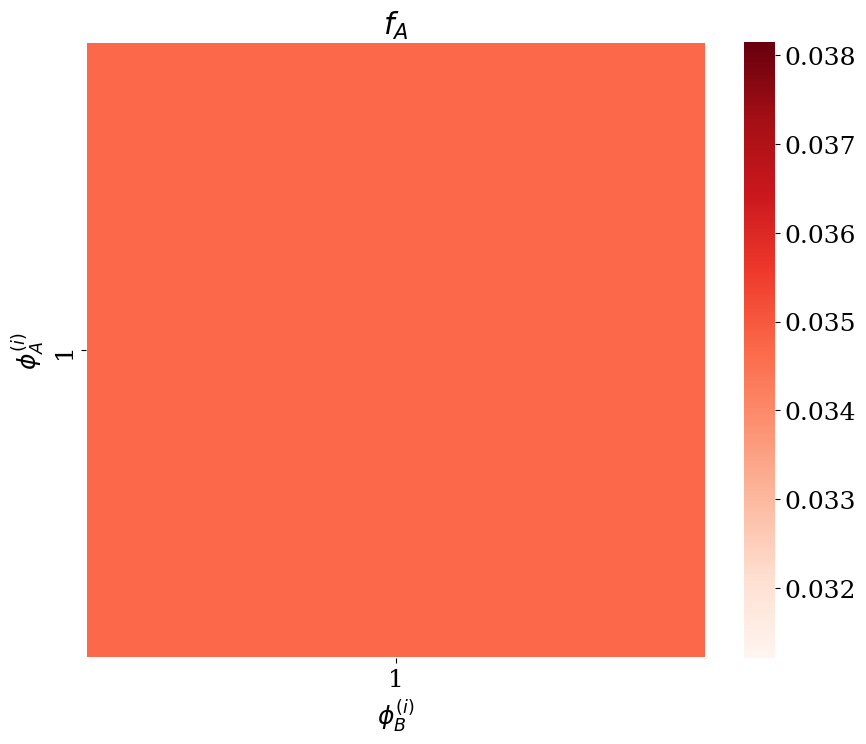

In [109]:
# err = np.sum(phases < 0)
# if err > 0 :
#     raise Exception("IVALID!!")
    
fig = plt.figure()
plt.figure(figsize=(10,8))

font = {'family' : 'serif',
        'weight':'normal',
        'size': 18}
plt.rc('font', **font)

# ax = sns.heatmap(phi_a_f, linewidth=0.25, cmap = "rainbow", xticklabels=np.round(muB_mat[0,:],2), yticklabels=np.round(muA_mat[:,0],2),\
#                  cbar_kws={'label':  r"$phase$"}, vmin=0, vmax=1)
ax = sns.heatmap(fA_mat[:,:], linewidth=0.25, cmap = "Reds", xticklabels=np.round(phi_b_i[:], 2), yticklabels=np.round(phi_a_i[:], 2))
                 # cbar_kws={'label':  r"$\phi$"})
# spacing = 1
# ax.set_xticks(ax.get_xticks()[::spacing])
# ax.set_xticklabels(np.round(muB_mat[0,:],2)[::spacing])#.astype(np.int64))
# ax.set_yticks(ax.get_yticks()[::spacing])
# ax.set_yticklabels(np.round(muA_mat[:,0],2)[::spacing])#.astype(np.int64))
ax.invert_yaxis()

plt.ylabel("$\phi_A^{(i)}$")
plt.xlabel("$\phi_B^{(i)}$")

# plt.title(r"$ignoring \ unbound  \ guests, \ equal \ prefactors \ spinodal $" +  "\n" + "$ N_P $= %s, " % N_P + " $N_A = N_B$ = %s, " % N_A + " $N_p \phi_p \chi_{AB} = $" + \
#           str(chi_AB*N_P*phi_p) \
#           + ", $\chi_{PS} = \chi_{AS} = \chi_{BS} =$" + str(chi_AS)  
#            +\
#           "\n" + "$\epsilon_b = $" + str(e_m[0]) + ", $v_{int} = $ [" + str(v_int[0]) + "," + str(v_int[1]) + "]") 
plt.title(r"$f_A$") 

# plt.savefig('OABS_phases.png')

### $s_\alpha^{(i,j)}$

In [112]:
M

50

Text(0, 0.5, '$\\langle s_\\alpha \\rangle$')

<Figure size 640x480 with 0 Axes>

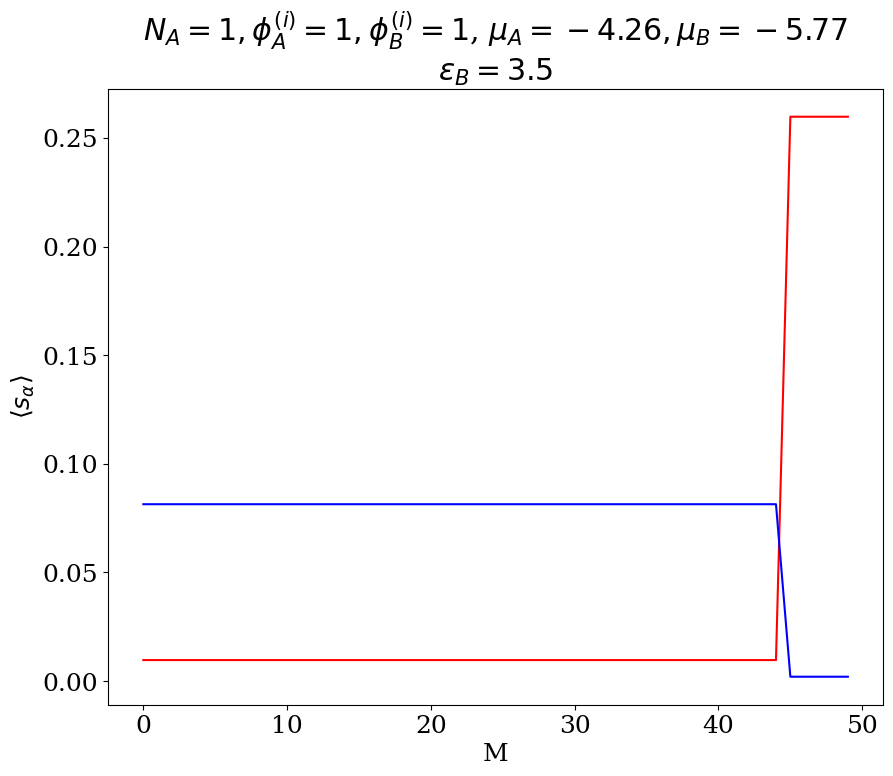

In [114]:
fig = plt.figure()
plt.figure(figsize=(10,8))

font = {'family' : 'serif',
        'weight':'normal',
        'size': 18}
plt.rc('font', **font)

i=-1
j=-1

mu_a = mu_A_mat[i,j]
mu_b = mu_B_mat[i,j]

plt.plot(np.arange(0,M,1),sA_mat[i,j,:], color = "red")
plt.plot(np.arange(0,M,1),sB_mat[i,j,:], color = "blue")


# i=55
# j=50

# plt.plot(np.arange(0,M,1),sA_mat[i,j,:], color = "orange", label=r"$\mu_A = %s, \mu_B = %s$" % (mu_a, mu_b))
# plt.plot(np.arange(0,M,1),sB_mat[i,j,:], color = "royalblue", label=r"$\mu_A = %s, \mu_B = %s$" % (mu_a, mu_b))
plt.title(r"$ N_A = %s, \phi_A^{(i)} = %s, \phi_B^{(i)} = %s$" % (N_A, np.round(phi_a_i[i],2), np.round(phi_b_i[j],2)) \
          + r", $\mu_A = %s, \mu_B = %s$" % (np.round(mu_a, 2), np.round(mu_b,2)) \
         + "\n" + "$\epsilon_B = %s$" % e_m[0])

plt.xlabel("M")
plt.ylabel(r"$\langle s_\alpha \rangle$")
# plt.legend()

# structure factors @ (i,j)

In [117]:
# # wider range
klog_min = -3.5
klog_max = -.1 # = np.log10(1/N_A)
klog_num = 10

k_vec = np.logspace(klog_min, klog_max, klog_num) / b_P

In [119]:
%%time

chi_AP = 0
chi_BP = 0
# chi_AB = 69.5 / (phi_p*N_P) 
chi_PS = 0
chi_AS = 0
chi_BS = 0


PP = np.zeros_like(k_vec)
AAb = np.zeros_like(k_vec)
AAu = np.zeros_like(k_vec)
AP = np.zeros_like(k_vec)
AB = np.zeros_like(k_vec)


# for i in range(len(phi_a_i)):
#     for j in range(len(phi_b_i)):
i = 0 
j = 0

s_bnd_A = sA_mat[i,j]
s_bnd_B = sB_mat[i,j]

phi_Au = phi_Au_mat[i,j]
phi_Bu = phi_Bu_mat[i,j]
phi_sf = phi_s[i,j]

phis = [phi_p_f, phi_Au, phi_Bu, phi_sf]

for ik, k in enumerate(k_vec):

    # G2 = gamma2_chis(psol, s_bnd_A, s_bnd_B, phis, k)
    S2_mat = calc_sf2(psol, [s_bnd_A, s_bnd_B], phis, k, plotting=True)
    S2_mat = np.array(S2_mat)
    PP[ik] = S2_mat[0,0]
    AAb[ik] = S2_mat[1,1]
    AAu[ik] = S2_mat[2,2]
    AP[ik] = S2_mat[0,1]
    AB[ik] = S2_mat[1,3]

CPU times: total: 15.6 ms
Wall time: 7.42 ms


In [120]:
N_B

1

<Figure size 640x480 with 0 Axes>

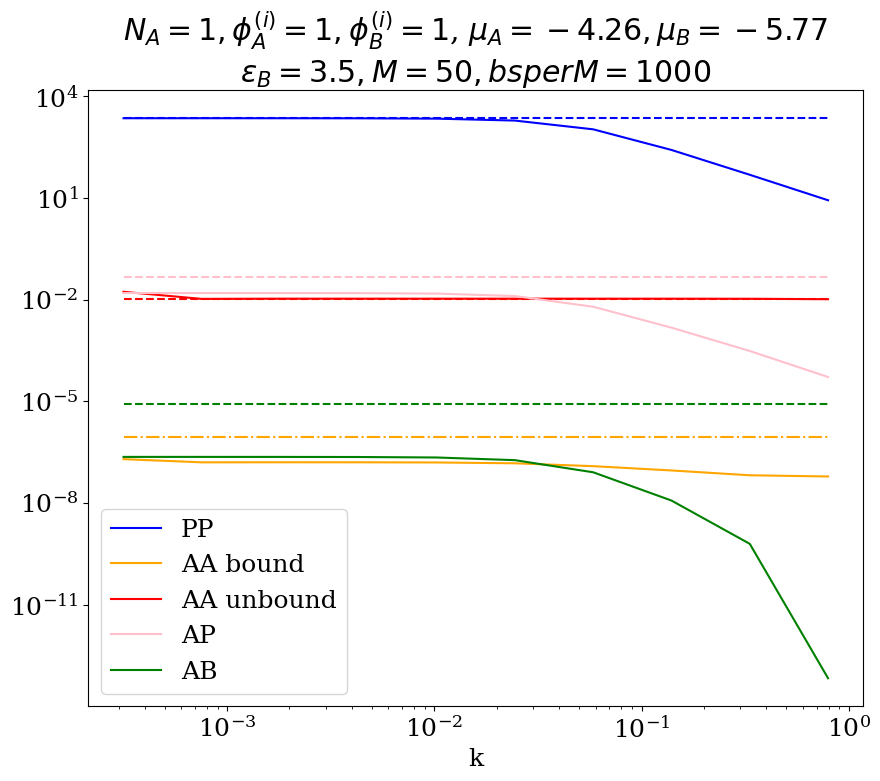

In [125]:
fig = plt.figure()
plt.figure(figsize=(10,8))

font = {'family' : 'serif',
        'weight':'normal',
        'size': 18}
plt.rc('font', **font)

plt.loglog(k_vec,PP, label = "PP", color = "blue")
plt.hlines(phi_p_f * N_P, k_vec[0], k_vec[-1], linestyle = "--", color = "blue")
plt.loglog(k_vec,AAb, label = "AA bound", color = "orange")
plt.hlines(phi_p_f * N_A**2 * (1/N_P)*0.1*0.1, k_vec[0], k_vec[-1], linestyle = "-.", color = "orange")
plt.loglog(k_vec,AAu, label = "AA unbound", color = "red")
plt.hlines(phi_Au * N_A, k_vec[0], k_vec[-1], linestyle = "--", color = "red")

plt.loglog(k_vec,AP, label = "AP", color = "pink")
plt.hlines(phi_p_f * N_A*0.1, k_vec[0], k_vec[-1], linestyle = "--", color = "pink")

plt.loglog(k_vec,AB,linestyle="-", label = "AB", color = "green")
plt.hlines(phi_p_f * N_A*N_B * (1/N_P)*0.1*0.9, k_vec[0], k_vec[-1], linestyle = "--", color = "green")

plt.xlabel("k")
plt.title(r"$ N_A = %s, \phi_A^{(i)} = %s, \phi_B^{(i)} = %s$" % (N_A, np.round(phi_a_i[i],2), np.round(phi_b_i[j],2)) \
          + r", $\mu_A = %s, \mu_B = %s$" % (np.round(mu_a, 2), np.round(mu_b,2)) \
         + "\n" + "$\epsilon_B = %s, M = %s, bs per M = %s$" % (e_m[0], M, bs_per_M))
plt.legend()

In [127]:
phi_p_f * N_A**2 * (1/N_P)

9e-05

# spinodal

In [130]:
%%time
chi_AP = 0
chi_BP = 0
# chi_AB = 69.5 / (phi_p*N_P) 
chi_PS = 0
chi_AS = 0
chi_BS = 0

# chis = [chi_AP, chi_BP, chi_AB, chi_PS, chi_AS, chi_BS]


min_eigval_arr = np.zeros((len(phi_a_i[:]), len(phi_b_i[:]), len(k_vec)))

min_eigval_arr_allk_DENS = np.zeros((len(phi_a_i[:]), len(phi_b_i[:])))
min_eigval_arr_allk_ps = np.zeros((len(phi_a_i[:]), len(phi_b_i[:])))

# UNBOUND AND BOUND COMBINED
print("unbound and bound combined")
assert unbound_bound_combined == True
min_eigvec_arr = np.zeros((len(phi_a_i[:]), len(phi_b_i[:]), len(k_vec), 3))
min_eigvec_arr_allk_DENS = np.zeros((len(phi_a_i[:]), len(phi_b_i[:]), 3))

# # UNBOUND AND BOUND separate
# print("unbound and bound separate")
# assert unbound_bound_combined == False
# min_eigvec_arr = np.zeros((len(phi_a_i[:]), len(phi_b_i[:]), len(k_vec), 5))
# min_eigvec_arr_allk_DENS = np.zeros((len(phi_a_i[:]), len(phi_b_i[:]), 5))


k_star_arr_DENS= np.zeros((len(phi_a_i[:]), len(phi_b_i[:])))# - 4

cond_num_arr = np.zeros((len(phi_a_i[:]), len(phi_b_i[:]), len(k_vec)))
max_cond_arr = np.zeros((len(phi_a_i[:]), len(phi_b_i[:])))

for i in range(len(phi_a_i)):
    for j in range(len(phi_b_i)):
        
        s_bnd_A = sA_mat[i,j]
        s_bnd_B = sB_mat[i,j]

        phi_Au = phi_Au_mat[i,j]
        phi_Bu = phi_Bu_mat[i,j]
        phi_sf = phi_s[i,j]

        phis = [phi_p_f, phi_Au, phi_Bu, phi_sf]
        # if i == 0 and j == len(phi_Au_arr)-1:
        #     print("SA: ", s_bnd_A)
        #     print("SB: ", s_bnd_B)
        for ik, k in enumerate(k_vec):

            G2 = gamma2_chis(psol, s_bnd_A, s_bnd_B, phis, k)
            
            val, vec = np.linalg.eigh(G2)
            # print(val)
            vec = vec.T
            min_val = np.min(val)            
            min_eigval_arr[i][j][ik] = min_val
            min_eigvec_arr[i][j][ik] = vec[np.where(val == min_val)]


        # all-k analysis
        # min eigvals, eigvecs at given mu1,mu2 for each k        
        min_vals = min_eigval_arr[i][j][:][np.nonzero(min_eigval_arr[i][j][:])] 
        min_vecs = min_eigvec_arr[i][j][:][np.nonzero(min_eigval_arr[i][j][:])]
        # minimum eigenvalue at given mu1,mu2 across all ks
        minval_allk = np.min(min_vals) 
        # print("minvals all k: ", minval_allk)
        # print(np.where(min_vals==minval_allk)[0])
        # store this eigenvalue and corresponding eigenvector
        min_eigval_arr_allk_DENS[i][j] = minval_allk 
        if len(np.where(min_vals==minval_allk)[0]) == 1:
            min_eigvec_arr_allk_DENS[i][j] = min_vecs[np.where(min_vals==minval_allk)]
            k_star = k_vec[np.where(min_vals==minval_allk)]
        else: #if mulitple minimum eigenvalues, just choose the first one (0) or last (-1)- same result
            # print("ARB")
            min_eigvec_arr_allk_DENS[i][j] = min_vecs[np.where(min_vals==minval_allk)][-1,:]
            k_star = k_vec[np.where(min_vals==minval_allk)][-1]

            # min_eigvec_arr_allk_DENS[i][j] = min_vecs[np.where(min_vals==minval_allk)][0,:]
            # k_star = k_vec[np.where(min_vals==minval_allk)][0]
        
        k_star_arr_DENS[i][j] = k_star

# setting all non-decomposed/ separated systems to 0 
poly_fluc = min_eigvec_arr_allk_DENS[:,:,0]
poly_fluc[np.where(np.sign(min_eigval_arr_allk_DENS) == 1) ] = 0

prot1_fluc = min_eigvec_arr_allk_DENS[:,:,1]
prot1_fluc[np.where(np.sign(min_eigval_arr_allk_DENS) == 1) ] = 0

prot2_fluc = min_eigvec_arr_allk_DENS[:,:,2]
prot2_fluc[np.where(np.sign(min_eigval_arr_allk_DENS) == 1) ] = 0

k_star_arr_DENS[np.where(np.sign(min_eigval_arr_allk_DENS) == 1) ] = -1 # unphysical value, to indicate outside of spinodal

unbound and bound combined
CPU times: total: 15.6 ms
Wall time: 12.7 ms


In [132]:
spinodal = np.copy(k_star_arr_DENS)
spinodal[np.where(spinodal == k_vec[0])] = 0 # macro
spinodal[np.where(spinodal > k_vec[0])] = 1 # micro

Text(0.5, 1.0, '$spinodal, N_A = 1, N_P = 5000, \\phi_P^{(f)} = 0.45, \\chi_{AB} = 0.8571428571428571, $\n$ M = 50, bind-sites \\ per \\ mon = 1000 , \\epsilon_B = 3.5$\n -1 = disordered, 0 = macrosep, 1 = microsep')

<Figure size 640x480 with 0 Axes>

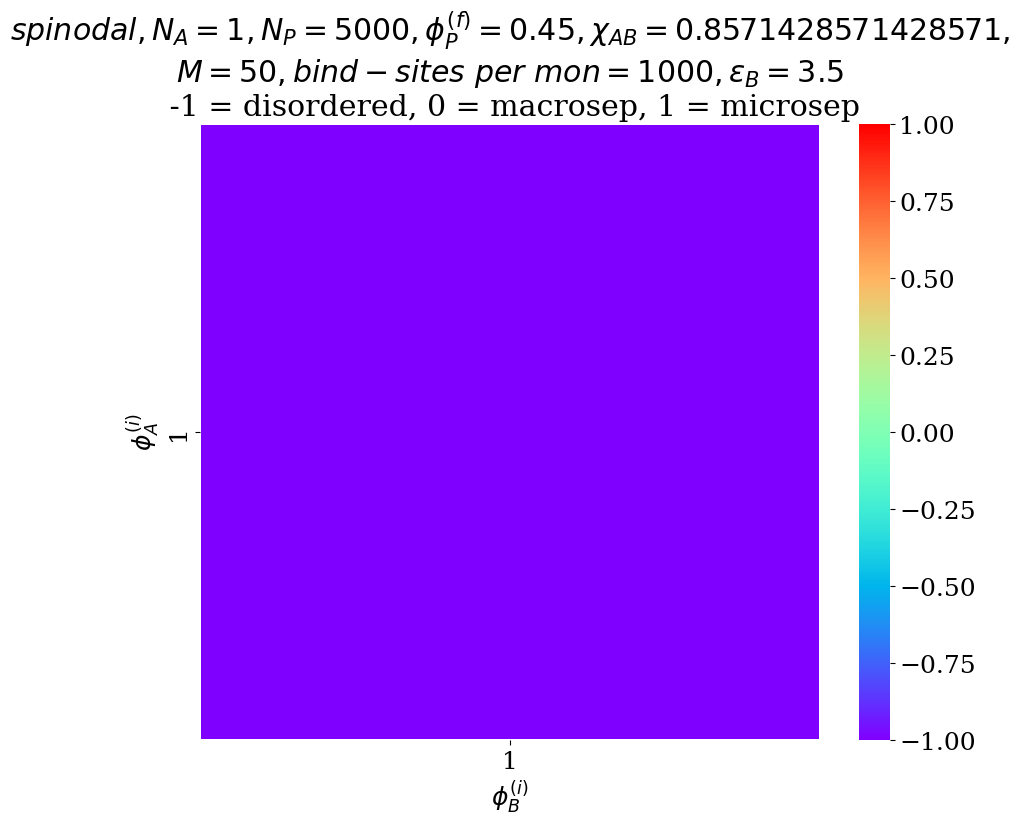

In [134]:
# err = np.sum(phases < 0)
# if err > 0 :
#     raise Exception("IVALID!!")
    
fig = plt.figure()
plt.figure(figsize=(10,8))

font = {'family' : 'serif',
        'weight':'normal',
        'size': 18}
plt.rc('font', **font)

ax = sns.heatmap(spinodal, linewidth=0.25, cmap = "rainbow", xticklabels=np.round(phi_b_i[:], 2), yticklabels=np.round(phi_a_i[:], 2),\
                 vmin=-1, vmax=1)# cbar_kws={'label':  r"$\phi$"})
spacing = 1
ax.set_xticks(ax.get_xticks()[::spacing])
ax.set_xticklabels(np.round(phi_b_i,2)[::spacing])#.astype(np.int64))
ax.set_yticks(ax.get_yticks()[::spacing])
ax.set_yticklabels(np.round(phi_b_i,2)[::spacing])#.astype(np.int64))
ax.invert_yaxis()
ax.axvline(x=36, linewidth=2, color="black")
plt.ylabel("$\phi_A^{(i)}$")
plt.xlabel("$\phi_B^{(i)}$")

plt.title(r"$spinodal, N_A = %s, N_P = %s, \phi_P^{(f)} = %s, \chi_{AB} = %s, $"% (N_A, N_P, phi_p_f, chi_AB,)\
          + "\n" + r"$ M = %s, bind-sites \ per \ mon = %s , \epsilon_B = %s$" % ( M, bs_per_M, e_m[0])\
         + "\n -1 = disordered, 0 = macrosep, 1 = microsep" ) 

# plt.savefig('OABS_phases.png')

In [40]:
N_P*chi_AB*phi_p_f

1928.5714285714284

# phase calc

In [27]:
k_star_arr_DENS[np.where(np.sign(min_eigval_arr_allk_DENS) == 1) ] = -1 # unphysical value, to indicate outside of spinodal

phases = np.zeros((len(phi_a_i), len(phi_b_i))) - 1 
minF_arr = np.zeros((len(phi_a_i), len(phi_b_i)))

for i in range(len(phi_a_i)):
    for j in range(len(phi_b_i)):
        if i == 0 or j == 0:
            continue

        q_star = k_star_arr_DENS[i,j]
        vec_star = min_eigvec_arr_allk_DENS[i,j]
        
        phi_sf = phi_s[i,j]
        phi_Au = phi_Au_mat[i,j]
        phi_Bu = phi_Bu_mat[i,j]
        # phi_Ab = phi_Ab_mat[i,j]
        # phi_Bb = phi_Bu_mat[i,j]
 
        phis = [phi_p_f, phi_Au, phi_Bu, phi_sf]
                
        # TODO- define phis
        
        if q_star == -1:
            print("out of spinodal; no q_star")
            phases[i,j] = 0 # disordered phase- outside of spinodal
        elif q_star == k_vec[0]:
        # elif q_star != k_vec[-1]:
            print("macrophase sep")
            phases[i,j] = 1 # macrophase sep

        else: #microphse sep
        
            s_bnd_A = sA_mat[i,j,:]#s_bind_A_ALL[i,j,:]
            s_bnd_B = sB_mat[i,j,:]#s_bind_B_ALL[i,j,:]
    
            lam_q = q_star*np.array([1, 0, 0])
            lam_q = np.linalg.norm(lam_q)
    
            cyl_q1 = q_star*np.array([1, 0, 0])
            # cyl_q1 = np.linalg.norm(cyl_q1)
            cyl_q2 = 0.5*q_star*np.array([-1, np.sqrt(3), 0])
            # cyl_q2 = np.linalg.norm(cyl_q2)
            cyl_q3 = 0.5*q_star*np.array([-1, -np.sqrt(3), 0])
            # cyl_q3 = np.linalg.norm(cyl_q3)
            cyl_qs = np.array([cyl_q1, cyl_q2, cyl_q3])
            
            bcc_q1 = 2**(-0.5)*q_star*np.array([1,1,0])
            bcc_q2 = 2**(-0.5)*q_star*np.array([-1,1,0])
            bcc_q3 = 2**(-0.5)*q_star*np.array([0,1,1])
            bcc_q4 = 2**(-0.5)*q_star*np.array([0,1,-1])
            bcc_q5 = 2**(-0.5)*q_star*np.array([1,0,1])
            bcc_q6 = 2**(-0.5)*q_star*np.array([1,0,-1])
            
            
            lam_g3 = 0
            G3 = gamma3(psol, s_bnd_A, s_bnd_B, phis, cyl_qs) # all g3s are eqivlaent
            cyl_g3 = (1/6)  * (1/(3*np.sqrt(3))) * 12 * G3#
            bcc_g3 = (4/(3*np.sqrt(6))) * G3
            
            G4_00 = gamma4(psol, s_bnd_A, s_bnd_B, phis, np.array([lam_q, -lam_q, lam_q, -lam_q]))
            lam_g4 = (1/24) * (6) * (1) * G4_00#gamma4_E(poly_mat, dens, N_m, b, M, np.array([lam_q, -lam_q, lam_q, -lam_q]))        
            
            cyl_g4 = (1/24) * (1/9) *(18*G4_00 + \
              72*gamma4(psol, s_bnd_A, s_bnd_B, phis, np.array([cyl_q1, -cyl_q1, cyl_q2, -cyl_q2])))
            
            bcc_g4 = (1/24)* (G4_00 \
                     + 8*gamma4(psol, s_bnd_A, s_bnd_B, phis, np.array([bcc_q1, -bcc_q1, bcc_q3, -bcc_q3])) \
                     + 2*gamma4(psol, s_bnd_A, s_bnd_B, phis, np.array([bcc_q1, -bcc_q1, bcc_q2, -bcc_q2])) \
                     + 4*gamma4(psol, s_bnd_A, s_bnd_B, phis, np.array([bcc_q1, -bcc_q3, bcc_q2, -bcc_q4])) )
    
            lam_g2 = (1/2) * 2 * (1) * gamma2_chis(psol, s_bnd_A, s_bnd_B, phis, q_star)
            cyl_g2 = lam_g2
            bcc_g2 = lam_g2

            print("made it to crit fluc")            
            # CRITICAL FLUCTIATION
            # define a lambda scalar value for a given critica lfluctutaion, then use roots equation to find cirtical points, and eval F at each
            lam_lambda_2 = np.einsum("ij,i,j ->", lam_g2, vec_star, vec_star)
            lam_lambda_4 = np.einsum("ijkl,i,j,k,l ->", -lam_g4, vec_star, vec_star, vec_star, vec_star)
    
            pos_l_amps = np.real(np.roots([4*lam_lambda_4,0,2*lam_lambda_2,0]))        
            lamF = min(np.real( lam_lambda_2 * pos_l_amps**2 + lam_lambda_4 * pos_l_amps**4))
    
            
            cyl_lambda_2 = np.einsum("ij,i,j ->", cyl_g2, vec_star, vec_star)
            cyl_lambda_3 = np.einsum("ijk,i,j,k->", cyl_g3, vec_star, vec_star, vec_star)
            cyl_lambda_4 = np.einsum("ijkl,i,j,k,l ->", -cyl_g4, vec_star, vec_star, vec_star, vec_star)
    
            pos_c_amps = np.real(np.roots([4*cyl_lambda_4,3*cyl_lambda_3,2*cyl_lambda_2,0]))        
            cylF = min(np.real( cyl_lambda_2 * pos_c_amps**2 + cyl_lambda_3*pos_c_amps**3 + cyl_lambda_4 * pos_c_amps**4))
    
            
            bcc_lambda_2 = np.einsum("ij,i,j ->", bcc_g2, vec_star, vec_star)
            bcc_lambda_3 = np.einsum("ijk,i,j,k->", bcc_g3, vec_star, vec_star, vec_star)
            bcc_lambda_4 = np.einsum("ijkl,i,j,k,l ->", -bcc_g4, vec_star, vec_star, vec_star, vec_star)
    
            pos_b_amps = np.real(np.roots([4*bcc_lambda_4,3*bcc_lambda_3,2*bcc_lambda_2,0]))        
            bccF = min(np.real( bcc_lambda_2 * pos_b_amps**2 + bcc_lambda_3*pos_b_amps**3 + bcc_lambda_4 * pos_b_amps**4))        
            
            
            minF = np.min([lamF, cylF, bccF, 0])
            minF_arr[i,j] = minF
            # print("--------------------------------------------------------------------")
            # print("energies:")
            print([lamF, cylF, bccF, 0])
            # print("--------------------------------------------------------------------")


            if minF == 0:
                # raise Exception("phase sep not stable in spinodal??")
                phases[i,j] = -2
            elif minF == lamF:
                phases[i,j] = 2
            elif minF == cylF:
                phases[i,j] = 3
            elif minF == bccF:
                phases[i,j] = 4
    

In [28]:
# err = np.sum(phases < 0)
# if err > 0 :
#     raise Exception("IVALID!!")
    
fig = plt.figure()
plt.figure(figsize=(10,8))

font = {'family' : 'serif',
        'weight':'normal',
        'size': 18}
plt.rc('font', **font)

# ax = sns.heatmap(phi_a_f, linewidth=0.25, cmap = "rainbow", xticklabels=np.round(muB_mat[0,:],2), yticklabels=np.round(muA_mat[:,0],2),\
#                  cbar_kws={'label':  r"$phase$"}, vmin=0, vmax=1)
ax = sns.heatmap(phases[1:,1:], linewidth=0.25, cmap = "viridis", xticklabels=np.round(phi_b_i[1:], 2), yticklabels=np.round(phi_a_i[1:], 2))
                 # cbar_kws={'label':  r"$\phi$"})
# spacing = 1
# ax.set_xticks(ax.get_xticks()[::spacing])
# ax.set_xticklabels(np.round(muB_mat[0,:],2)[::spacing])#.astype(np.int64))
# ax.set_yticks(ax.get_yticks()[::spacing])
# ax.set_yticklabels(np.round(muA_mat[:,0],2)[::spacing])#.astype(np.int64))
ax.invert_yaxis()

plt.ylabel("$\phi_A^{(i)}$")
plt.xlabel("$\phi_B^{(i)}$")

# plt.title(r"$ignoring \ unbound  \ guests, \ equal \ prefactors \ spinodal $" +  "\n" + "$ N_P $= %s, " % N_P + " $N_A = N_B$ = %s, " % N_A + " $N_p \phi_p \chi_{AB} = $" + \
#           str(chi_AB*N_P*phi_p) \
#           + ", $\chi_{PS} = \chi_{AS} = \chi_{BS} =$" + str(chi_AS)  
#            +\
#           "\n" + "$\epsilon_b = $" + str(e_m[0]) + ", $v_{int} = $ [" + str(v_int[0]) + "," + str(v_int[1]) + "]") 
plt.title(r"$phases$") 

# plt.savefig('OABS_phases.png')

ValueError: zero-size array to reduction operation fmin which has no identity

<Figure size 640x480 with 0 Axes>

<Figure size 1000x800 with 0 Axes>